Lets fetch data from url

In [2]:
import pandas as pd
import os

def get_data(year,month,region='QLD', path='data'):
    # regions : QLD,NSW,VIC,SA
    # first date for data : January 1999
    available_regions = ['QLD','NSW','VIC','SA']
    available_months = ['01','02','03','04','05','06','07','08','09','10','11','12']
    available_years = [str(i) for i in range(1999,2017)]


    if region not in available_regions:
        raise Exception('Region not found!')

    if year not in available_years:
        raise Exception('Year not found!')

    if month not in available_months:
        raise Exception('Month not found! Check 02-2 issue')


    url_csv = "https://www.aemo.com.au/aemo/data/nem/priceanddemand/PRICE_AND_DEMAND_{}{}_{}1.csv".format(year,month,region)
    filename = "{}_{}_{}.csv".format(year, month, region)
    path_region = path+'/'+region

    # if folder not found in current dir
    if region not in os.listdir(path):
        os.makedirs(path_region)

    # if not already exist
    if filename not in os.listdir(path_region):
        print('Fetching url...')
        print(url_csv)
        df = pd.read_csv(url_csv)

        print('Saving...', filename)
        df.to_csv("{}/{}/{}_{}_{}.csv".format(path,region,year, month, region))

    else:
        print(filename,' already exist.')





available_months = ['01','02','03','04','05','06','07','08','09','10','11','12']
available_years = [str(i) for i in range(1999,2017)]
available_regions = ['QLD','NSW','VIC','SA']

for r in available_regions:
    for y in available_years:
        for m in available_months:
            get_data(y, m, region=r)

1999_01_QLD.csv  already exist.
1999_02_QLD.csv  already exist.
1999_03_QLD.csv  already exist.
1999_04_QLD.csv  already exist.
1999_05_QLD.csv  already exist.
1999_06_QLD.csv  already exist.
1999_07_QLD.csv  already exist.
1999_08_QLD.csv  already exist.
1999_09_QLD.csv  already exist.
1999_10_QLD.csv  already exist.
1999_11_QLD.csv  already exist.
1999_12_QLD.csv  already exist.
2000_01_QLD.csv  already exist.
2000_02_QLD.csv  already exist.
2000_03_QLD.csv  already exist.
2000_04_QLD.csv  already exist.
2000_05_QLD.csv  already exist.
2000_06_QLD.csv  already exist.
2000_07_QLD.csv  already exist.
2000_08_QLD.csv  already exist.
2000_09_QLD.csv  already exist.
2000_10_QLD.csv  already exist.
2000_11_QLD.csv  already exist.
2000_12_QLD.csv  already exist.
2001_01_QLD.csv  already exist.
2001_02_QLD.csv  already exist.
2001_03_QLD.csv  already exist.
2001_04_QLD.csv  already exist.
2001_05_QLD.csv  already exist.
2001_06_QLD.csv  already exist.
2001_07_QLD.csv  already exist.
2001_08_

In [3]:
df1 = pd.read_csv('data/NSW/1999_01_NSW.csv')
df1 = df1.drop(labels=df1.columns[0], axis=1)
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,1999/01/01 00:30,6820.56000,27.64,TRADE
1,NSW1,1999/01/01 01:00,6421.34833,26.64,TRADE
2,NSW1,1999/01/01 01:30,5991.45000,25.81,TRADE
3,NSW1,1999/01/01 02:00,5663.07333,19.94,TRADE
4,NSW1,1999/01/01 02:30,5384.04667,19.48,TRADE


In [4]:
df2 = pd.read_csv('data/NSW/1999_02_NSW.csv')

df2 = df2.drop(labels=df2.columns[0], axis=1)
df2.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,1999/02/01 00:30,6135.45833,14.71,TRADE
1,NSW1,1999/02/01 01:00,5973.37333,14.50,TRADE
2,NSW1,1999/02/01 01:30,5803.53167,16.20,TRADE
3,NSW1,1999/02/01 02:00,5558.06500,14.38,TRADE
4,NSW1,1999/02/01 02:30,5378.94833,14.27,TRADE


In [5]:
df_total = pd.DataFrame()
df1 = pd.read_csv('data/NSW/1999_01_NSW.csv')

df_total = df_total.append(df1)

df_total.head()


,Unnamed: 0,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,0,NSW1,1999/01/01 00:30,6820.56000,27.64,TRADE
1,1,NSW1,1999/01/01 01:00,6421.34833,26.64,TRADE
2,2,NSW1,1999/01/01 01:30,5991.45000,25.81,TRADE
3,3,NSW1,1999/01/01 02:00,5663.07333,19.94,TRADE
4,4,NSW1,1999/01/01 02:30,5384.04667,19.48,TRADE


In [6]:

# merge dataset into 1 big dataset.
def merge_data(path='data', region='QLD', save=True):
    
   
    available_months = ['01','02','03','04','05','06','07','08','09','10','11','12']
    available_years = [str(i) for i in range(1999,2017)]
    
    available_filenames = []
    
    for y in available_years:
        for m in available_months:
            available_filenames.append("{}/{}/{}_{}_{}.csv".format(path,region,y, m, region))
    
    df_total = pd.DataFrame()
    for filename in available_filenames:
        df_cur = pd.read_csv(filename)
        df_total = df_total.append(df_cur)
        

    df_total = df_total.drop(labels=df_total.columns[0], axis=1)
    df_total = df_total.reset_index(drop=True)
    
    if save:
        df_total.to_csv('{}/{}_all.csv'.format(path,region))
    
    return df_total
    

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 6)

# read dataset
data = pd.read_csv('data/QLD_all.csv', index_col=0)
data.head()


,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,QLD1,1999/01/01 00:30,3987.83333,19.34,TRADE
1,QLD1,1999/01/01 01:00,3783.16667,17.47,TRADE
2,QLD1,1999/01/01 01:30,3621.33333,17.08,TRADE
3,QLD1,1999/01/01 02:00,3487.50000,15.84,TRADE
4,QLD1,1999/01/01 02:30,3386.50000,15.68,TRADE


In [8]:
data['price_norm'] = (data.RRP - data.RRP.min())/(data.RRP.max()-data.RRP.min())
data['demand_norm'] = (data.TOTALDEMAND - data.TOTALDEMAND.min())/(data.TOTALDEMAND.max()-data.TOTALDEMAND.min())


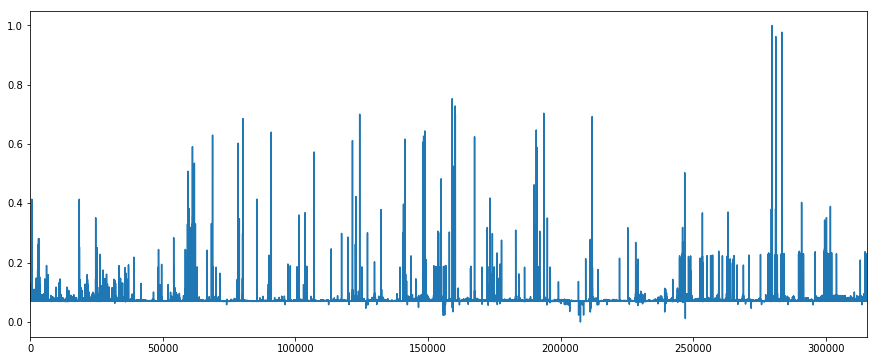

In [9]:
data['price_norm'].plot()

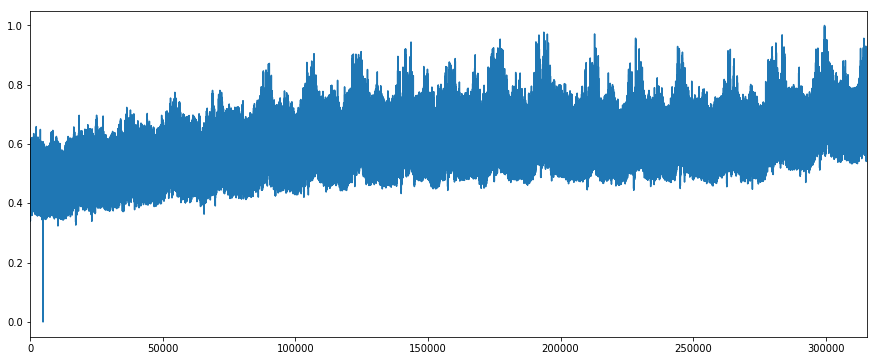

In [10]:
data['demand_norm'].plot()

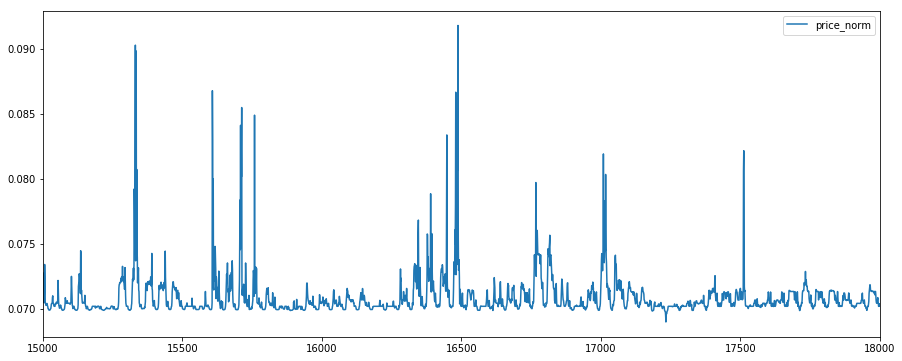

In [11]:
data[['price_norm']].iloc[15000:18000].plot()



In [12]:
data.SETTLEMENTDATE.ix[15000]

'1999/11/09 15:30'

In [13]:
data.SETTLEMENTDATE.ix[18000]

'2000/01/11 03:30'